# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_study = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how="outer")

# Display the data table for preview
complete_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
unique_mice_count = complete_study['Mouse ID'].nunique()
unique_mice_count

249

In [3]:
total_mice = complete_study['Mouse ID'].count()
total_mice

1893

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_rows = complete_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice = complete_study[duplicate_rows]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = complete_study[duplicate_rows]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
# Identify Mouse IDs with duplicates
duplicate_mouse_ids = complete_study[complete_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse_data = complete_study[complete_study['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Define the mouse ID to clean
specific_mouse_id = 'g989'
# Remove duplicates for the specific Mouse ID
removed_mouse = duplicate_mouse_data.drop_duplicates(subset=['Timepoint'])
complete_clean_study = complete_study[complete_study['Mouse ID'] != specific_mouse_id]

In [7]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = complete_clean_study['Mouse ID'].count()
num_unique_mice


1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

avg_tumor_volume = complete_clean_study['Tumor Volume (mm3)'].groupby(complete_clean_study["Drug Regimen"]).mean()
med_tumor_volume = complete_clean_study['Tumor Volume (mm3)'].groupby(complete_clean_study["Drug Regimen"]).median()
var_tumor_volume = complete_clean_study['Tumor Volume (mm3)'].groupby(complete_clean_study["Drug Regimen"]).var()
std_tumor_volume = complete_clean_study['Tumor Volume (mm3)'].groupby(complete_clean_study["Drug Regimen"]).std()
sem_tumor_volume = complete_clean_study['Tumor Volume (mm3)'].groupby(complete_clean_study["Drug Regimen"]).sem()

tumors_df = pd.DataFrame({"Mean Tumor Volume":avg_tumor_volume, 
                          "Median Tumor Volume":med_tumor_volume,
                          "Tumor Volume Variance":var_tumor_volume,
                          "Tumor Volume Std. Dev.":std_tumor_volume,
                          "Tumor Volume Srd. Err.":sem_tumor_volume}).reset_index()
tumors_df


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Srd. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumors_df = complete_clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']).reset_index()
tumors_df

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

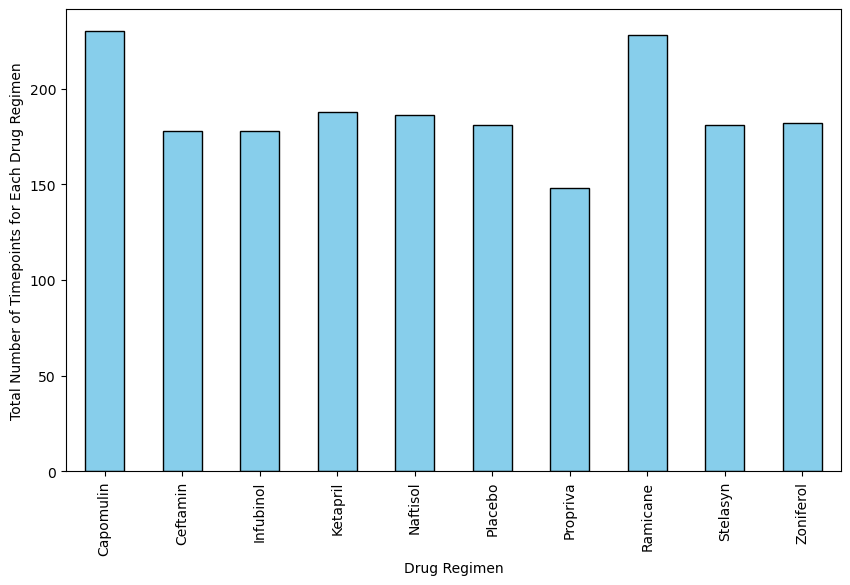

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = complete_clean_study.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.ylabel('Total Number of Timepoints for Each Drug Regimen')
plt.show()

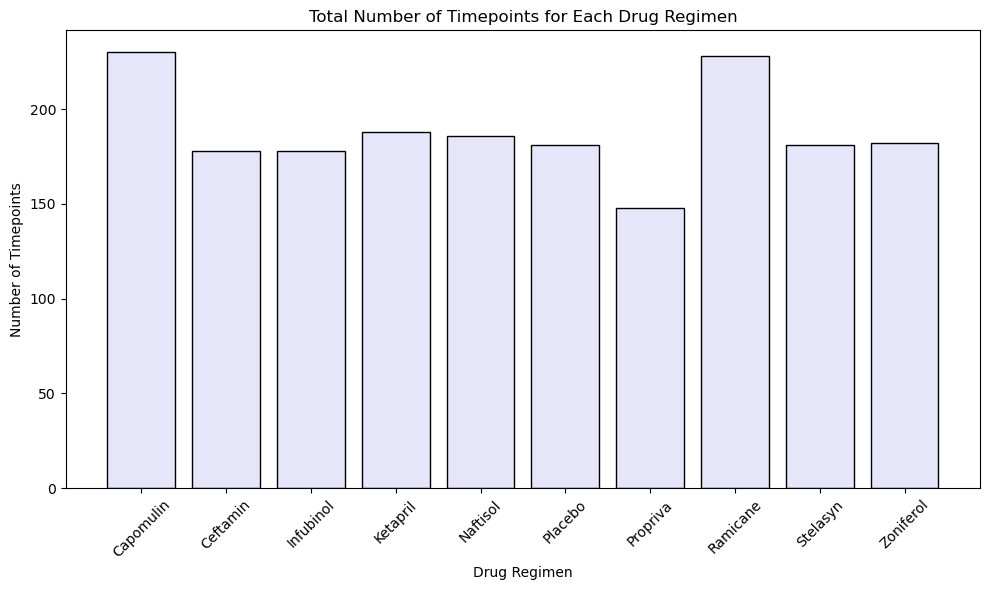

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_counts = complete_clean_study.groupby('Drug Regimen').size()

plt.figure(figsize=(10, 6))
plt.bar(timepoint_counts.index, timepoint_counts.values, color='lavender', edgecolor='black')

plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()



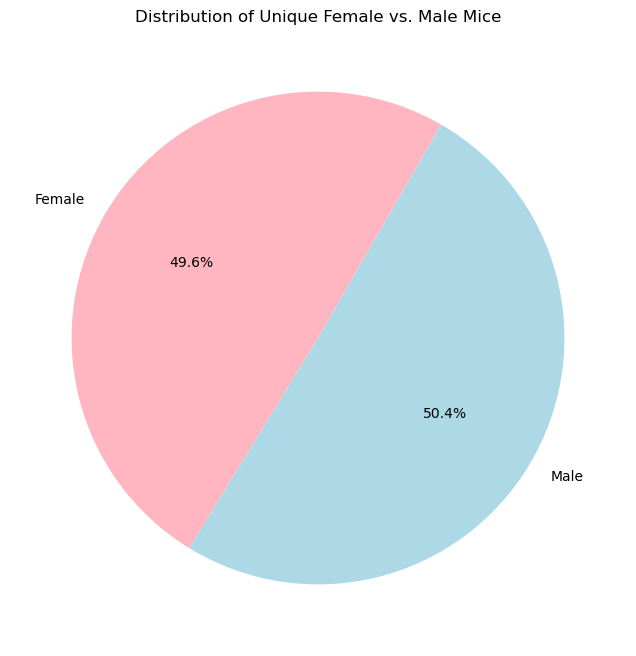

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Count unique Mouse IDs for each gender
gender_counts = complete_clean_study.groupby('Sex')['Mouse ID'].nunique()

# Plot pie chart using pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightpink', 'lightblue'], startangle=60, figsize=(8, 8))
plt.title('Distribution of Unique Female vs. Male Mice')
plt.ylabel('')  # Hide the y-label as it's not needed in a pie chart

# Show the plot
plt.show()





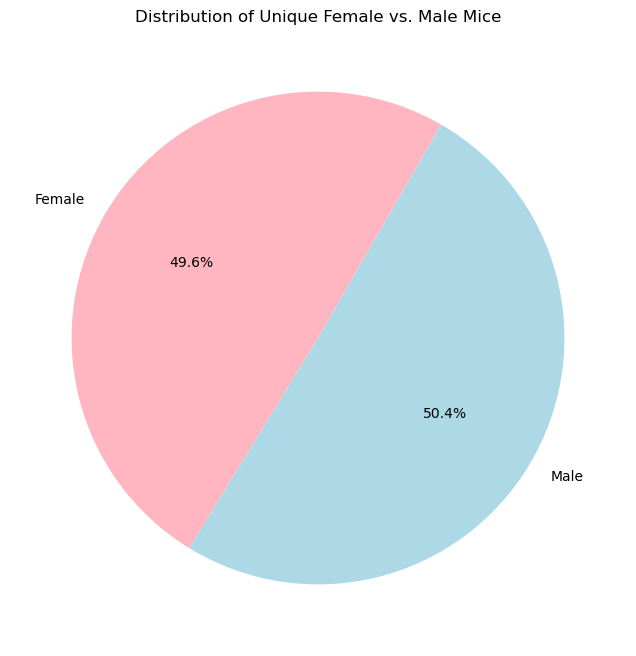

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Count unique Mouse IDs for each gender
gender_counts = complete_clean_study.groupby('Sex')['Mouse ID'].nunique()

# Extract labels and sizes for the pie chart
labels = gender_counts.index
sizes = gender_counts.values

# Plot pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightpink', 'lightblue'], startangle=60)

# Add title
plt.title('Distribution of Unique Female vs. Male Mice')

# Show the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
regimens_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

last_timepoint_df = complete_clean_study.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, complete_clean_study, on=['Mouse ID', 'Timepoint'])

filtered_df = merged_df[merged_df['Drug Regimen'].isin(regimens_of_interest)]


In [15]:
# Put treatments into a list for the loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

# Loop through each treatment to process and find outliers
for treatment in treatments:
    # Filter DataFrame for the current treatment
    drug_df = filtered_df[filtered_df['Drug Regimen'] == treatment]
    
    # Get tumor volumes for the current treatment
    tumor_volumes_current = drug_df['Tumor Volume (mm3)']
    
    # Append tumor volumes to the list
    tumor_volumes.append(tumor_volumes_current.tolist())
    
    # Calculate the IQR for the current treatment
    quartiles = tumor_volumes_current.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    # Locate potential outliers
    outliers = drug_df[(drug_df['Tumor Volume (mm3)'] < lower_bound) |
                       (drug_df['Tumor Volume (mm3)'] > upper_bound)]
    
    # Print results for the current treatment
    print(f"Treatment: {treatment}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers: {outliers.shape[0]}")
    print(f"Outliers:\n{outliers[['Mouse ID', 'Tumor Volume (mm3)']]}\n")


Treatment: Capomulin
Lower Bound: 20.70
Upper Bound: 51.83
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []

Treatment: Ramicane
Lower Bound: 17.91
Upper Bound: 54.31
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []

Treatment: Infubinol
Lower Bound: 36.83
Upper Bound: 82.74
Number of Outliers: 1
Outliers:
   Mouse ID  Tumor Volume (mm3)
31     c326           36.321346

Treatment: Ceftamin
Lower Bound: 25.36
Upper Bound: 87.67
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []



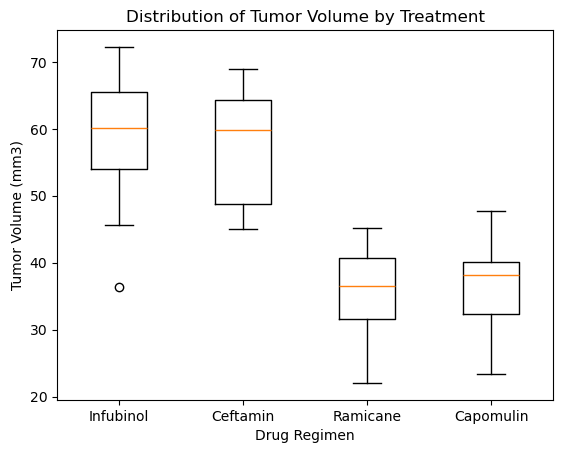

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volumes = [filtered_df[filtered_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].tolist()
                 for regimen in filtered_df['Drug Regimen'].unique()]

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volumes, labels=filtered_df['Drug Regimen'].unique())

ax1.set_title('Distribution of Tumor Volume by Treatment')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

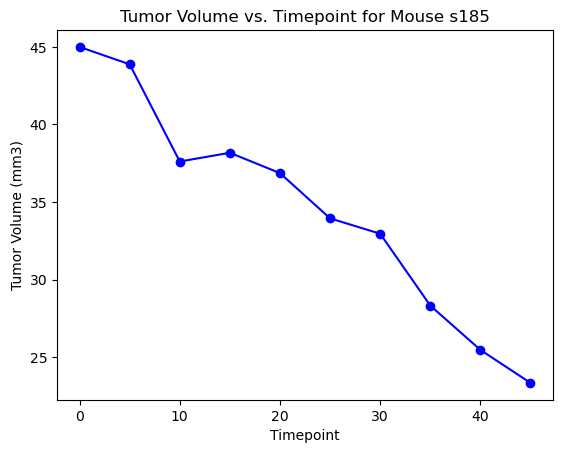

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185' 
treatment = 'Capomulin'
mouse_data = complete_clean_study[(complete_clean_study['Mouse ID'] == mouse_id) & (complete_clean_study['Drug Regimen'] == treatment)]

fig, ax = plt.subplots()
ax.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

ax.set_title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id}')
ax.set_xlabel('Timepoint')
ax.set_ylabel('Tumor Volume (mm3)')

plt.show()


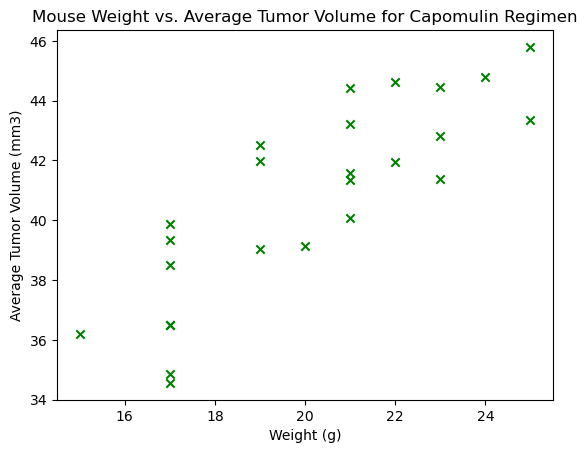

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter data for Capomulin regimen
capomulin_df = complete_clean_study[complete_clean_study['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the unique mouse weights and merge with average tumor volumes
capomulin_weight_df = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
capomulin_weight_df.set_index('Mouse ID', inplace=True)
capomulin_weight_df['Average Tumor Volume (mm3)'] = avg_tumor_volume

# Reset index to prepare for plotting
capomulin_weight_df.reset_index(inplace=True)

# Create scatter plot
fig, ax = plt.subplots()
ax.scatter(capomulin_weight_df['Weight (g)'], capomulin_weight_df['Average Tumor Volume (mm3)'], color='g', marker='x')

# Set plot title and labels
ax.set_title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()




## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


Correlation Coefficient: 0.84


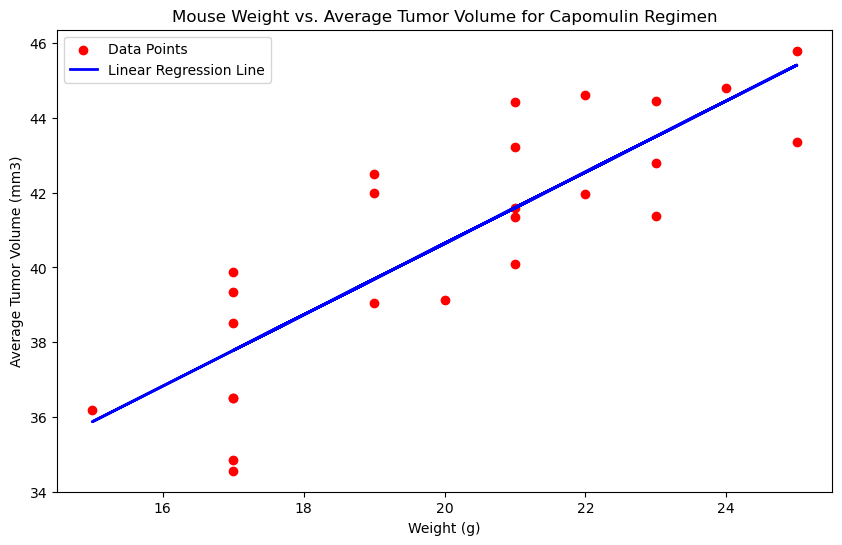

In [20]:
# Filter data for the Capomulin regimen
capomulin_df = complete_clean_study[complete_clean_study['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume per mouse
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'}, inplace=True)

# Get weight data
capomulin_weight_df = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Merge average tumor volume with weight data
capomulin_weight_df = pd.merge(capomulin_weight_df, avg_tumor_volume, on='Mouse ID')

# Drop rows with NaN values
capomulin_weight_df.dropna(inplace=True)

# Reset index after dropping rows
capomulin_weight_df.reset_index(drop=True, inplace=True)

# Check if the DataFrame is empty
if capomulin_weight_df.empty:
    raise ValueError("No data available for plotting. Check the cleaned DataFrame.")
else:
    # Extract the data for correlation and regression
    X = capomulin_weight_df['Weight (g)']
    y = capomulin_weight_df['Average Tumor Volume (mm3)']

    # Ensure data types are correct
    X = X.astype(float)
    y = y.astype(float)

    # Calculate the correlation coefficient
    correlation = X.corr(y)
    print(f"Correlation Coefficient: {correlation:.2f}")

    # Perform linear regression using numpy
    try:
        slope, intercept = np.polyfit(X, y, 1)
    except np.linalg.LinAlgError:
        raise RuntimeError("Linear regression did not converge.")
    except TypeError as e:
        raise RuntimeError(f"Error with polyfit: {e}")
    else:
        # Predict values for the regression line
        regression_line = slope * X + intercept

        # Create a scatter plot with the regression line
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='red', marker='o', label='Data Points')
        plt.plot(X, regression_line, color='blue', linewidth=2, label='Linear Regression Line')

        # Set titles and labels
        plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
        plt.xlabel('Weight (g)')
        plt.ylabel('Average Tumor Volume (mm3)')
        plt.legend()

        # Show the plot
        plt.show()

